# 03.01 Plot Reference

The full `matplotlib` engine is big and full of functionality.
Yet, we will attempt to cover the most commonly used plotting
techniques and several of their options.
The following is organized in a reference style.
This is because one is not supposed to remember this plethora
of commands and options.
Instead, one shall come back here or to the official
documentation when faced with a specific graphing problem.

Let's explore that `pyplot` interface with some examples of stylying graphs.
First the imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

One could use `plt.figure` and then `plt.axes` to get a hold of a single
figure with a single axes but using `plt.subplots` is often quicker.
By default (i.e. without positional arguments) `plt.subplots` will create
a single figure containing one axes.

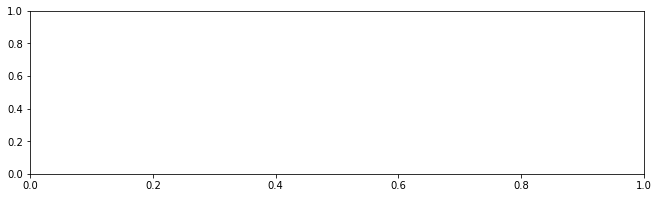

In [2]:
fig, ax = plt.subplots(figsize=(11, 3))

## Numerical Computing - Again

We saw a handful of plots already but we did not talk about how they were made.
A plotted function is made numerically,
i.e. several points are plotted and straight lines are interleaved between them.
In other words, there is nothing particularly clever happening inside the plotting engine,
you only apply a function to each point and then plot the (x, y) vectors against each other.
For example, if we use a small number of points we can see the straight lines.

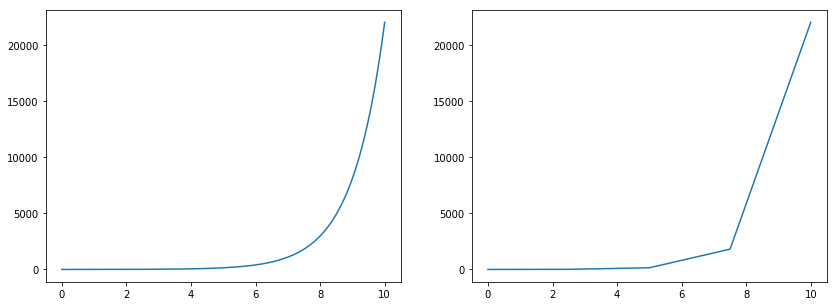

In [3]:
fig, axi = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(0, 10, 128)
axi.flat[0].plot(x, np.exp(x))
x = np.linspace(0, 10, 5)
axi.flat[1].plot(x, np.exp(x));

## Styling the Plot

As a visualization library specialized in plotting numerical functions,
`matplotlib` has lots of ways to customize a plot.
The simplest customizations are the most often used, these include:
styles of lines, axes limits and text on the plot.
There are many, many, many more customization options,
most of which are useful in particular problems and require a look into
the documentation even from people with great memory.
The secret is not to remember the information,
it is to have a good intuition about how to search for it.

### Colors, Lines and GNUPlot

The `color=` argument accepts:

- HTML color names
- HTML colors in `#RRGGBB` format
- An `(R, G, B)` tuple
- A single number between 0 and 1 meaning a grayscale
- And GNUPlot color names (including abbreviations)

The `linestyle=` argument accepts:

- Named styles: solid, dotted, dashed, dashdot
- Abbreviated styles: `-`, `:`. `--`, `-.` 

The `marker=` argument accepts several single character abbreviations of markers.

All these arguments can be combined as a single argument using the abbreviations.
By passing a 3rd argument to `plot` (or similar function) combining the
line style, color and marker (in that order) produces a specific plot style.
This is legacy from how the GNUPlot used style definitions,
yet it is still used in much of today's code.

Here are the reference tables for abbreviations:

| string | line style |
|:------ |:---------- |
| -      | solid      |
| --     | dashed     |
| -.     | dash-dot   |
| :      | dotted     |

| character | color   |
|:--------- |:------- |
| b         | blue    |
| g         | green   |
| r         | red     |
| c         | cyan    |
| m         | magenta |
| y         | yellow  |
| k         | black   |
| w         | white   |

| character | marker         |
|:--------- |:-------------- |
| .         | point          |
| ,         | pixel          |
| o         | circle         |
| v         | triangle down  |
| ^         | triangle up    |
| <         | triangle left  |
| >         | triangle right |
| s         | square         |
| p         | pentagon       |
| \*        | star           |
| h         | hexagon        |
| H         | fat hexagon    |
| \+        | plus           |
| x         | ex             |
| D         | diamond        |
| d         | thin diamond   |

Several other variants are available too, see [the docs][plot].

[plot]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html "matplotlib plot"

By calling `plot` several times on the same axes one can plot several functions,
let's build a handful of line style, color and marker examples on a single image.

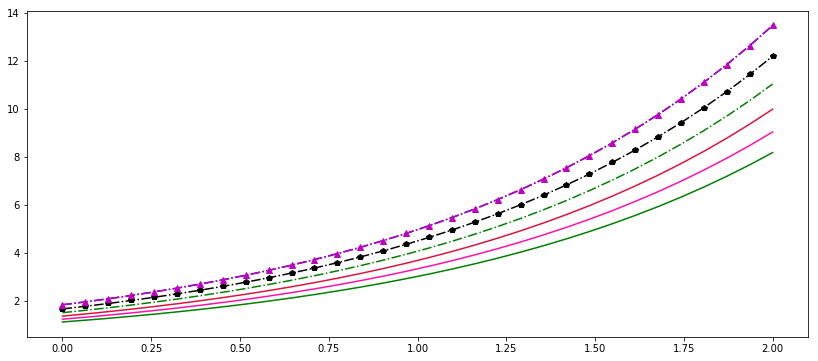

In [4]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 2, 32)

ax.plot(x, np.exp(x + 0.1), color='green')
ax.plot(x, np.exp(x + 0.2), color='#fe11aa')
ax.plot(x, np.exp(x + 0.3), color='crimson')
ax.plot(x, np.exp(x + 0.4), color='g', linestyle='dashdot')
ax.plot(x, np.exp(x + 0.5), color='k', linestyle='dashdot', marker='p')
ax.plot(x, np.exp(x + 0.6), '-.b')
ax.plot(x, np.exp(x + 0.6), '-.m^');

### Labels

A plot isn't complete without text.
Typical annotations on a plot are what is on each axis and a title.

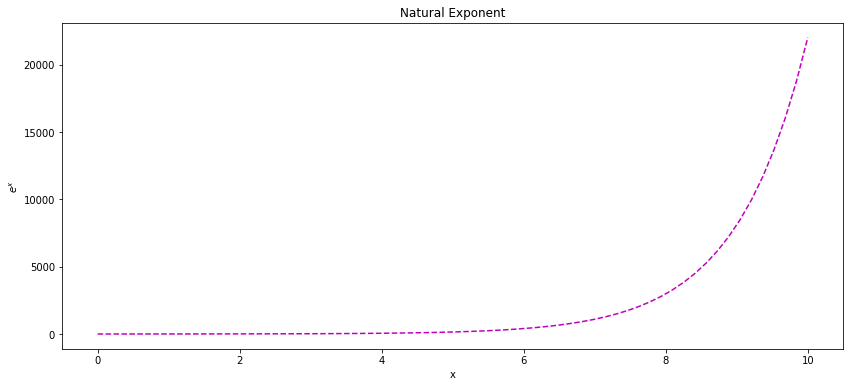

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 10, 64)

ax.plot(x, np.exp(x), '--m')
ax.set_title('Natural Exponent')
ax.set_xlabel('x')
ax.set_ylabel('$e^x$');

When several functions are plotted a legend is a way to describe the plot.
The legend aggregates all `label=` arguments of plotting functions.
The `loc=` argument is used to provide a hint for the best legend location.

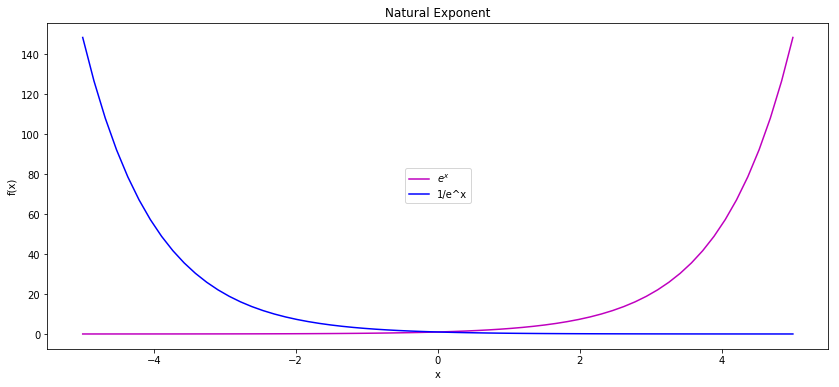

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(-5, 5, 64)

ax.plot(x, np.exp(x), '-m', label='$e^x$')
ax.plot(x, 1/np.exp(x), '-b', label='1/e^x')
ax.set_title('Natural Exponent')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend(loc='center');

### Axis Limits

By default the limits of the axes are taken from the minimum and maximum values of the plotted function.
Yet, we can customize those.

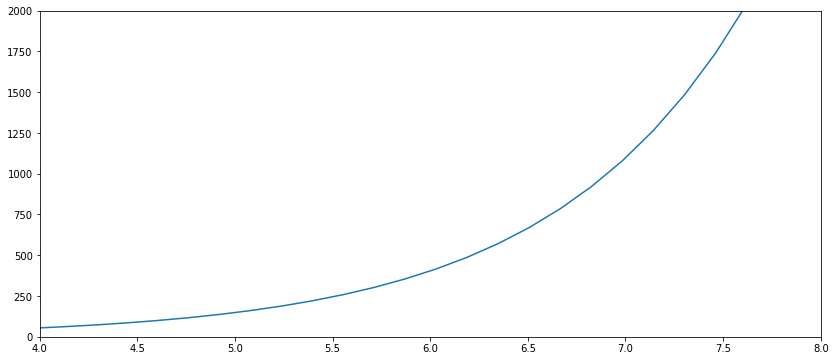

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 10, 64)

ax.plot(x, np.exp(x))
ax.axis([4, 8, 0, 2000]);

Other options are:

- `axis('tight')` - binds closer to the function limits (really visible within crowded plots)
- `axis('equal')` - same scale on both axes (x and y)

One can set the axes independently with `set_xlim` and `set_ylim`.
Moreover, one can combine labeling and tiding the axes with the `set` method of the axes,
which can perform several plot functions at once.  For example:

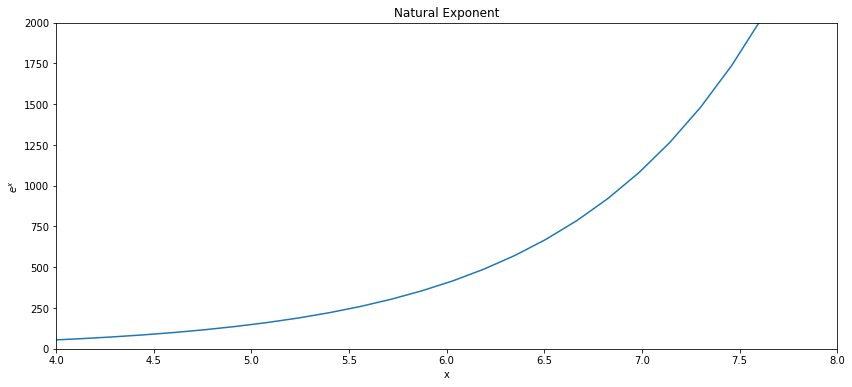

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 10, 64)

ax.axis([4, 8, 0, 2000]);
ax.plot(x, np.exp(x))
ax.set(xlim=(4, 8), ylim=(0, 2000), xlabel='x', ylabel='$e^x$', title='Natural Exponent');

### $\LaTeX$

You may have noticed stings written between dollar signs (`$`),
which, when plotted, produce some magic characters.
Text within dollar signs is interpreted as [$\LaTeX$][latex] (pronounced lah-tek)
and can contain a plethora of mathematical expressions.

[latex]: https://www.latex-project.org/ "LaTeX project"

$\LaTeX$ is a typesetting engine, originally for mathematical papers,
used as a standard for publications in several fields.
$\LaTeX$ is huge, and covering it is a course of its own;
moreover since `Jupyter` supports only partial $\LaTeX$ through the [MathJax][math]
JavaScript library, whilst `matplotlib` support is through its selected backend engine.
Yet, we will try a quick run through.

[math]: https://www.mathjax.org/ "MathJax"

The `{` and `}` characters perform grouping, the `\` character starts a function.
A function performs some form of display action based on the groupings passed to it.
(One can think of the groupings as function arguments.)
Here are some characters and display functions supported.

| symbol               | code                 |
|:-------------------- |:-------------------- |
| $\alpha$             | `\alpha`             |
| $\phi$               | `\phi`               |
| $\Phi$               | `\Phi`               |
| $\Pi$                | `\Pi`                |
| $\pi$                | `\pi`                |
| $\theta$             | `\theta`             |
| $\mu$                | `\mu`                |
| $\nabla$             | `\nabla`             |
| $\frac{\mu}{\theta}$ | `\frac{\mu}{\theta}` |
| $x^y$                | `x^y`                |
| $x_y$                | `x_y`                |
| $\sum$               | `\sum`               |
| $\prod$              | `\prod`              |
| $\in$                | `\in`                |
| $\notin$             | `\notin`             |
| $\partial$           | `\partial`           |
| $\ell$               | `\ell`               |
| $\neg$               | `\neg`               |
| $\forall$            | `\forall`            |
| $\vec{x}$            | `\vec{x}`            |

Symbol support is slightly different between `matplotlib` and `jupyter`
but we can use `jupyter` equations show how we can combine $\LaTeX$ elements.

$$
\frac{\sum^{N}_{i=0} x^i}{i}
$$

The above equation is generated by `\frac{\sum^{N}_{i=0} x^i}{i}`.

## Other Plotting Functions - Error Bars

There are more specialized functions in `matplotlib` for specific problems.
One such is `errorbar`, for plotting measures with a measure error.
Here the `fmt=` argument works as the third argument to `plot`,
accepting abbreviations of line style, color and/or marker.

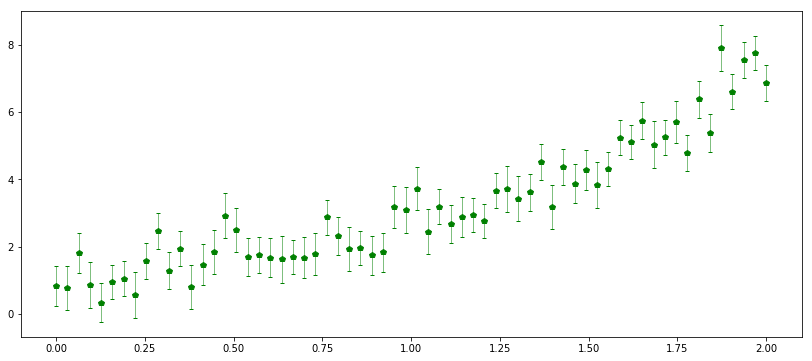

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 2, 64)
dy = 0.5 + 0.2 * np.random.random(64)
y = np.exp(x) + dy * np.random.randn(64)

ax.errorbar(x, y, yerr=dy, fmt='pg', elinewidth=0.5, capsize=2);

Of course one can style the `errorbar` plot too.

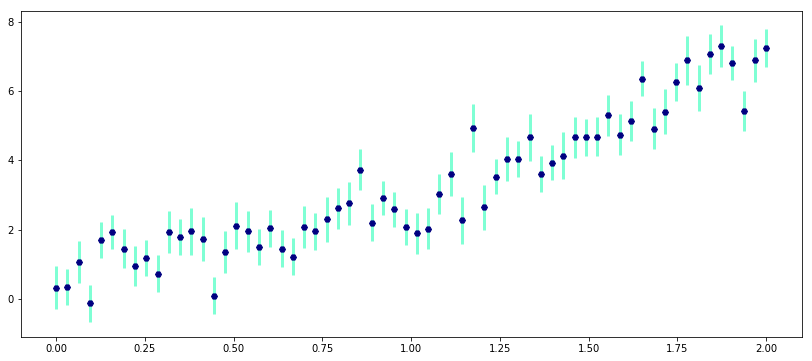

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 2, 64)
dy = 0.5 + 0.2 * np.random.random(64)
y = np.exp(x) + dy * np.random.randn(64)

ax.errorbar(x, y, yerr=dy, fmt='H', color='navy', ecolor='aquamarine', elinewidth=3, capsize=0);

`yerr` are vertical error bars, `xerr` can be used to plot horizontal ones.

One cannot remember the full set of customizations.
Each plot is different and to make a plot look good one will always need to try out
several options, and search the documentation for customization possibilities.